#### Importing dependencies and packages

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns =999

Loading the dataset

In [48]:
bike_dataset=pd.read_csv('hour.csv')

In [49]:
bike_dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [50]:
#statistical information
bike_dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [51]:
bike_dataset.shape

(17379, 17)

In [52]:
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [53]:
#unique values 
bike_dataset.apply(lambda x:len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [54]:
#check for null values 
bike_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [55]:
bike_dataset=bike_dataset.rename(columns={'weathersit':'weather','yr':'year','mnth':'month','hr':'hour','hum':'humidity','cnt':'count'})

In [56]:
bike_dataset.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [57]:
#drop unnecessary columns
bike_dataset=bike_dataset.drop(columns=['instant','dteday','year'])

In [58]:
#change int columns to category 
cols=['season','month','hour','holiday','weekday','workingday','weather']
for col in cols:
    bike_dataset[col]=bike_dataset[col].astype('category')
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


##### Exploratory data analysis

<AxesSubplot:xlabel='hour', ylabel='count'>

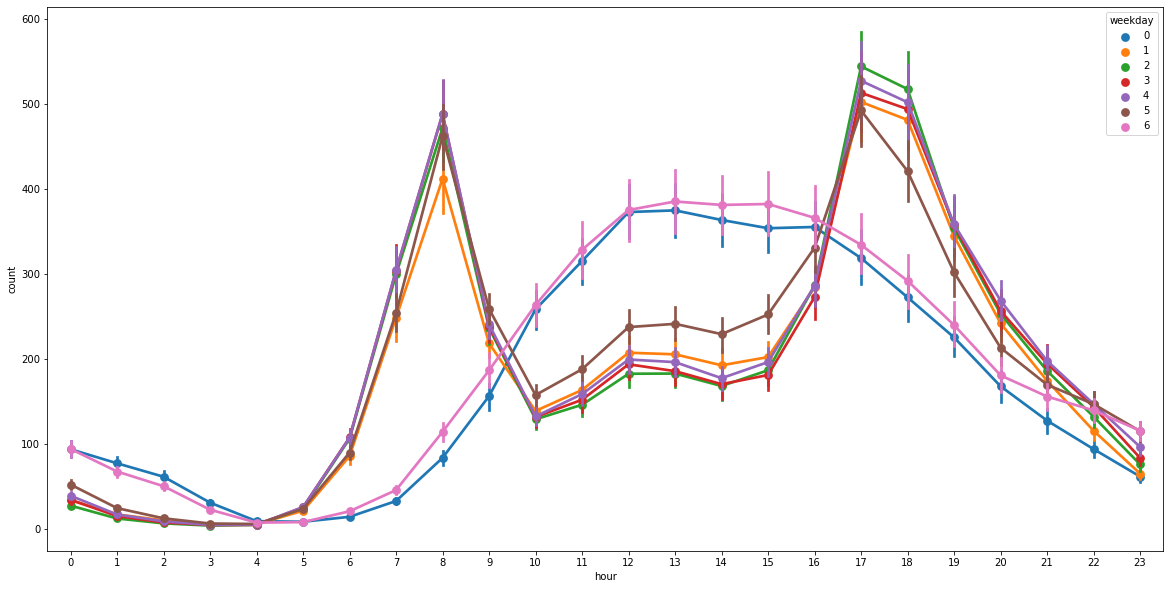

In [59]:
fig,ax= plt.subplots(figsize=(20,10))
sns.pointplot(data=bike_dataset,x='hour',y='count',hue='weekday',ax=ax)

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends:Unregistered Users')]

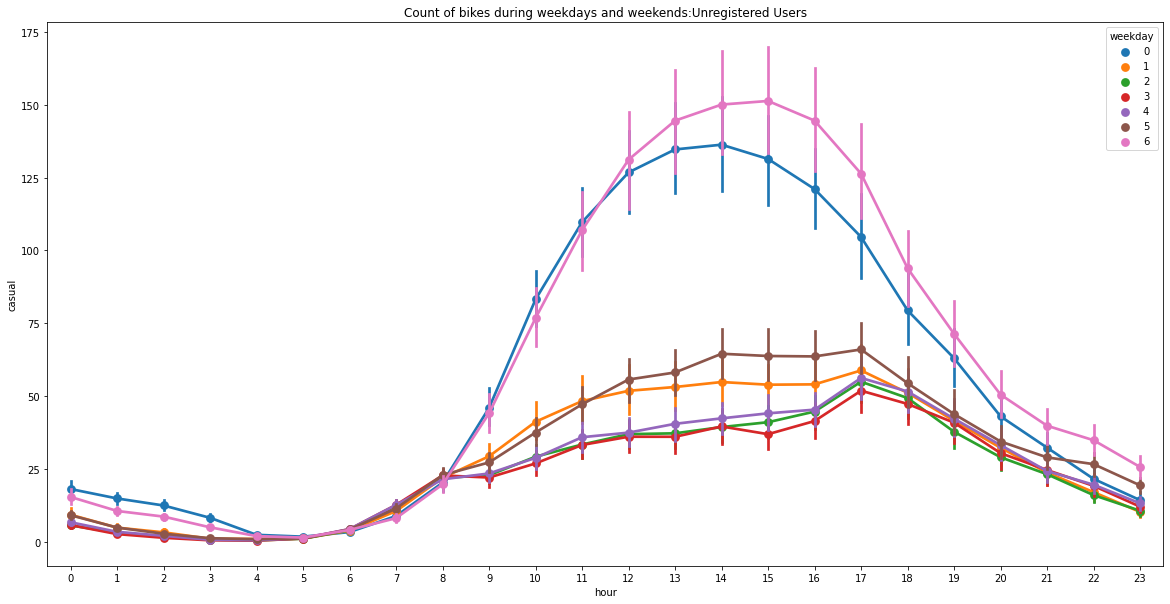

In [60]:
fig,ax= plt.subplots(figsize=(20,10))
sns.pointplot(data=bike_dataset,x='hour',y='casual',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends:Unregistered Users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends :Regsitered')]

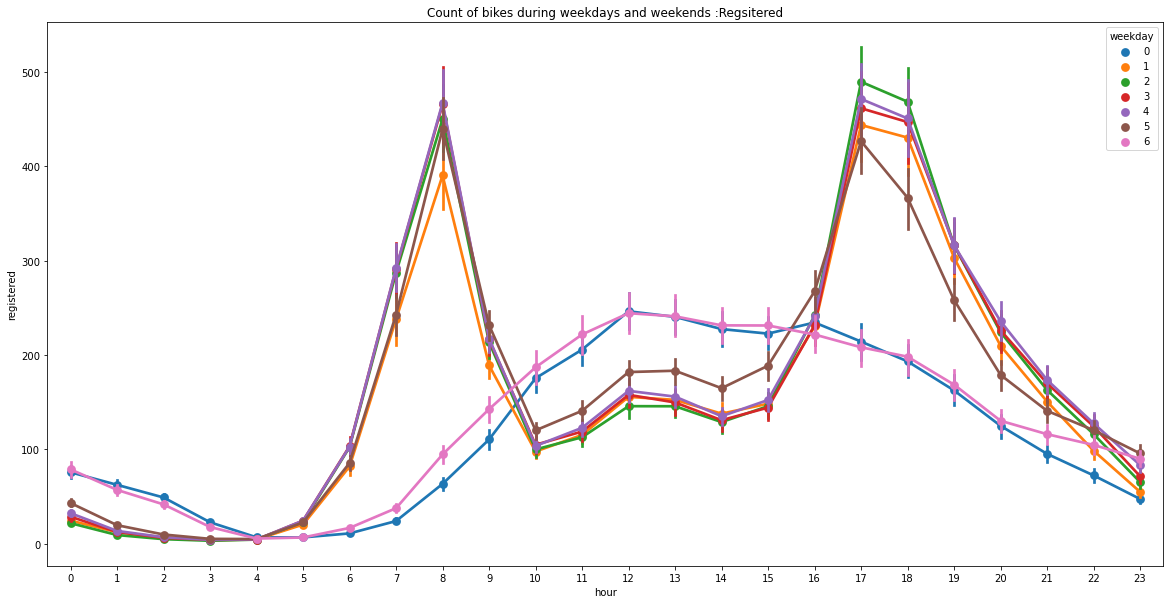

In [61]:
fig,ax= plt.subplots(figsize=(20,10))
sns.pointplot(data=bike_dataset,x='hour',y='registered',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends :Regsitered')

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

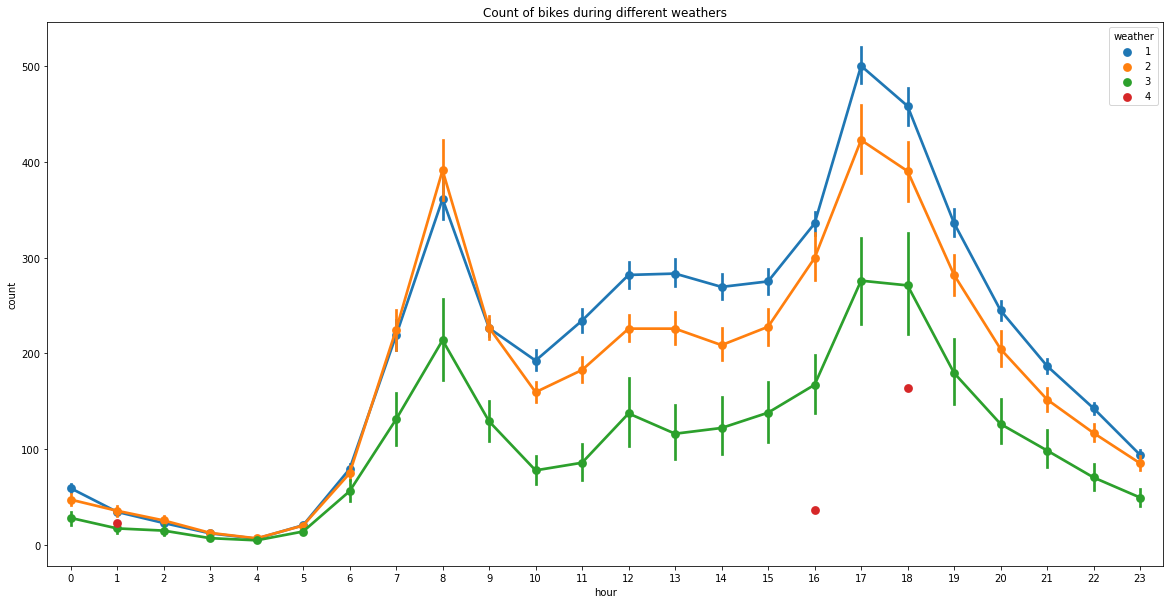

In [62]:
fig,ax= plt.subplots(figsize=(20,10))
sns.pointplot(data=bike_dataset,x='hour',y='count',hue='weather',ax=ax)
ax.set(title='Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

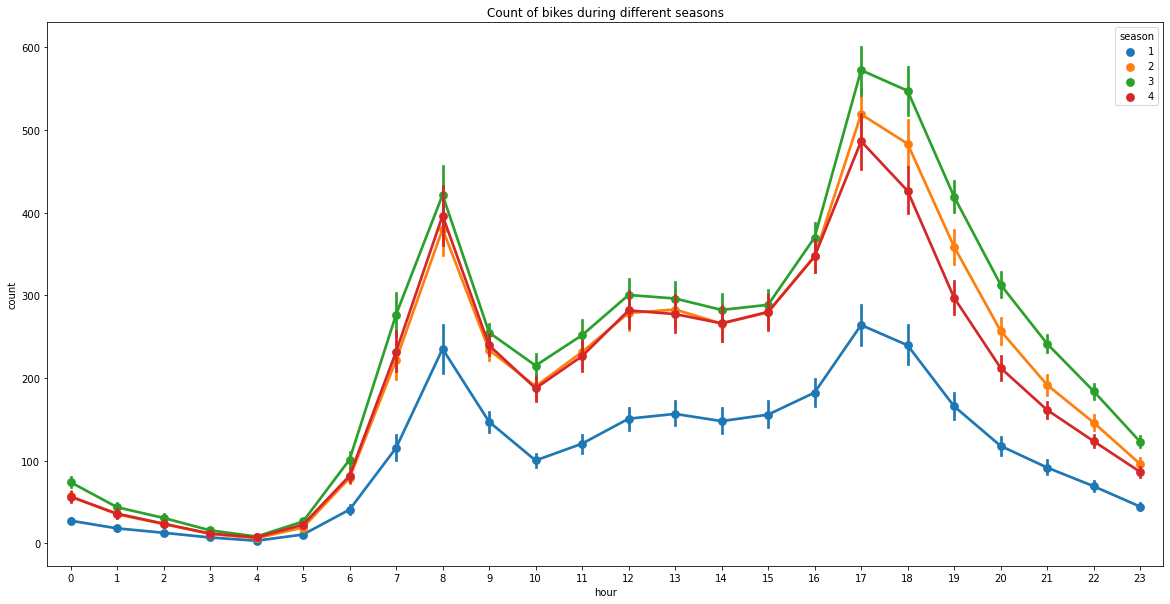

In [63]:
fig,ax= plt.subplots(figsize=(20,10))
sns.pointplot(data=bike_dataset,x='hour',y='count',hue='season',ax=ax)
ax.set(title='Count of bikes during different seasons')

[Text(0.5, 1.0, 'Count of bikes during different months')]

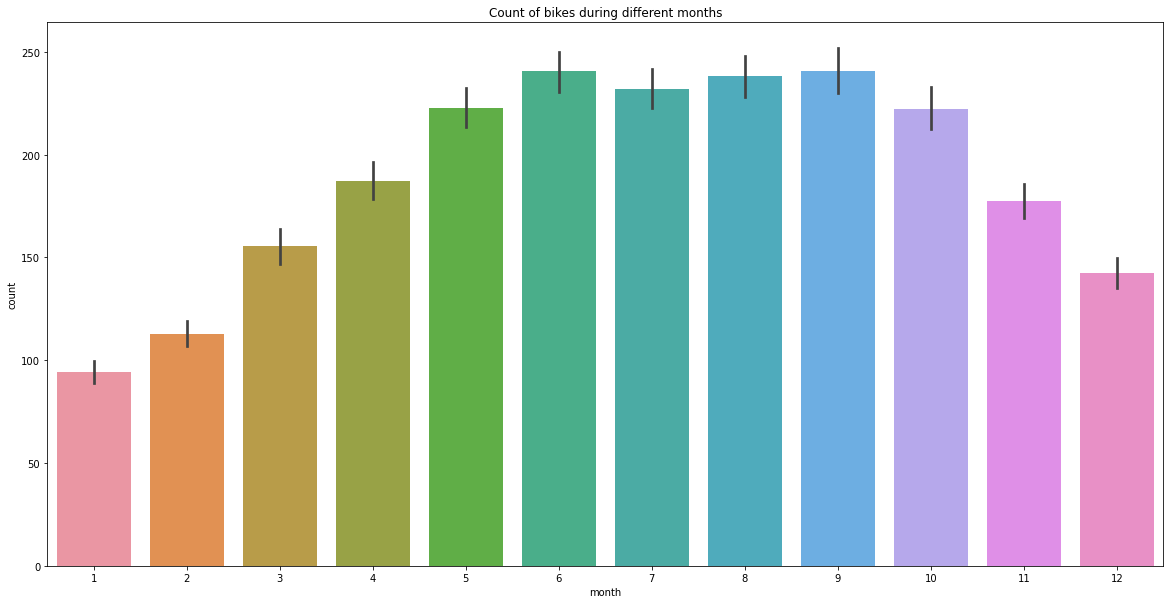

In [64]:
fig,ax= plt.subplots(figsize=(20,10))
sns.barplot(data=bike_dataset,x='month',y='count',ax=ax)
ax.set(title='Count of bikes during different months')

##### Correlation matrix

<AxesSubplot:>

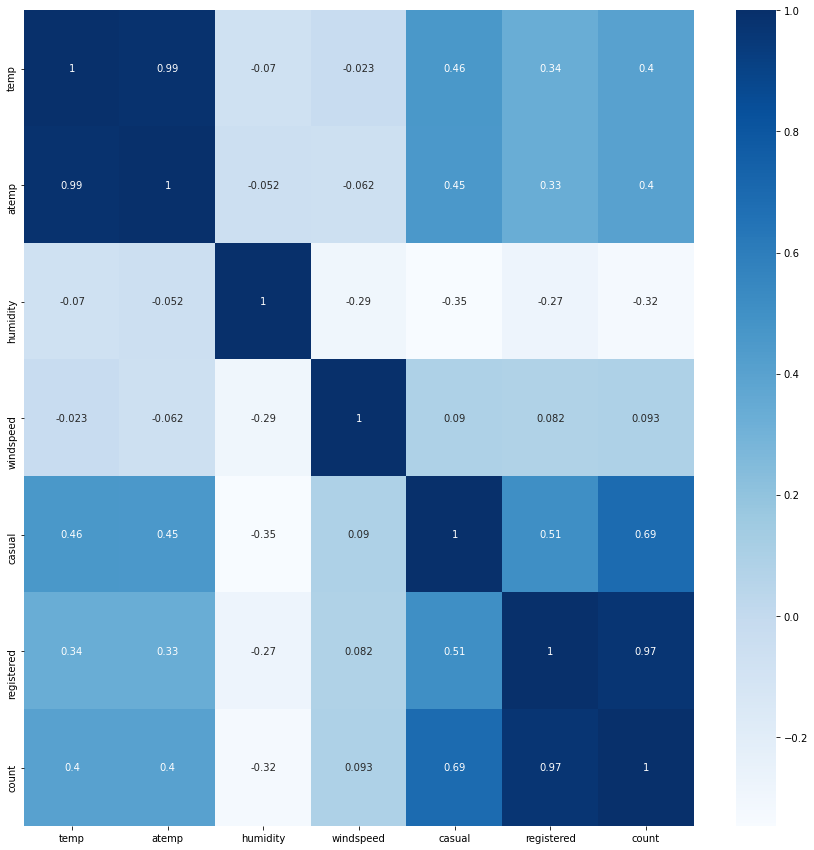

In [65]:
correlation=bike_dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True,cmap='Blues')

[Text(0.5, 1.0, 'Relation b/w humidity and user count')]

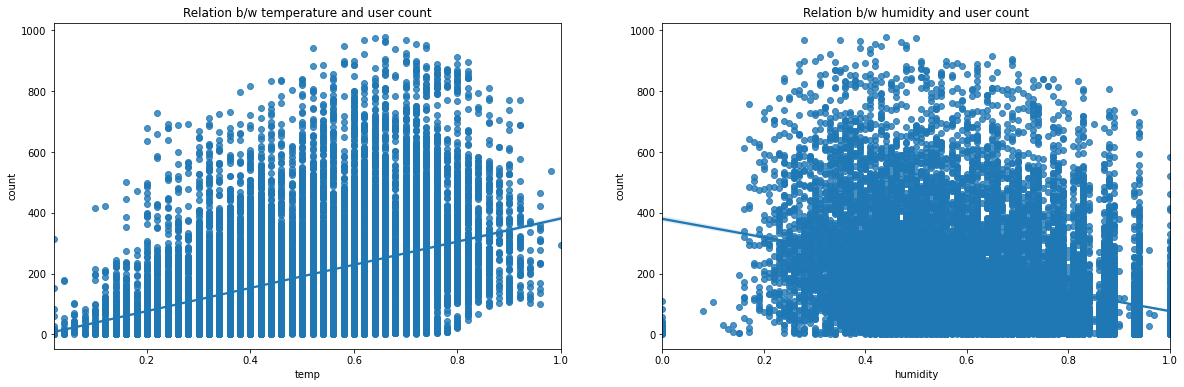

In [66]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.regplot(x=bike_dataset['temp'],y=bike_dataset['count'],ax=ax1)
ax1.set(title='Relation b/w temperature and user count')

sns.regplot(x=bike_dataset['humidity'],y=bike_dataset['count'],ax=ax2)
ax2.set(title='Relation b/w humidity and user count')

[Text(0.5, 1.0, 'Theoretical quantiles')]

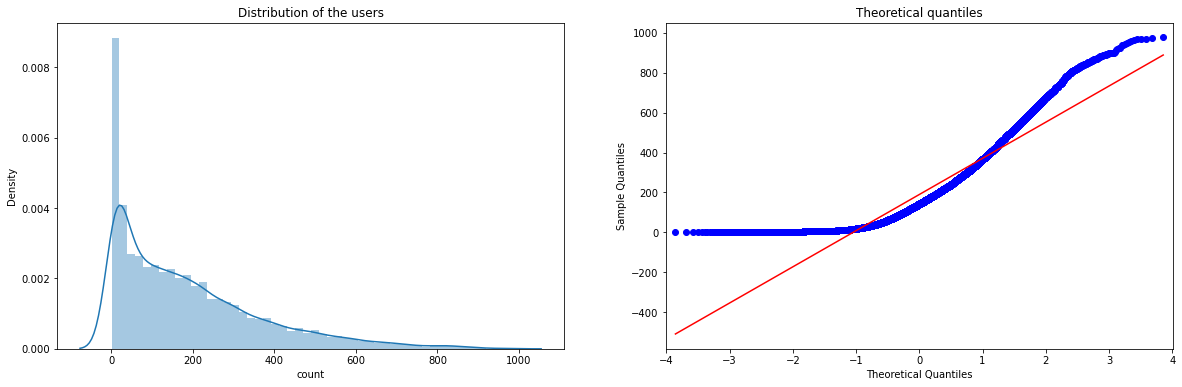

In [67]:
from statsmodels.graphics.gofplots import qqplot
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.distplot(bike_dataset['count'],ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(bike_dataset['count'],ax=ax2,line='s')
ax2.set(title='Theoretical quantiles')

#### One hot encoding

In [68]:
bike_dataset_encoded=bike_dataset.copy()

In [69]:
def one_hot_encoding(data,column):
    data=pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)],axis=1)
    data=data.drop([column],axis=1)
    return data

In [70]:
for col in cols:
    bike_dataset_encoded=one_hot_encoding(bike_dataset_encoded,col)
bike_dataset_encoded.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Input split 


In [71]:
X=bike_dataset_encoded.drop(['atemp','windspeed','casual','registered','count'],axis=1)
Y=bike_dataset_encoded['count']

##### Model training 

In [72]:
from sklearn.linear_model import LinearRegression,Ridge,HuberRegressor,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor

models=[LinearRegression(),
        Ridge(),
        HuberRegressor(),
        ElasticNetCV(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        ExtraTreesRegressor(),
        GradientBoostingRegressor()  
]

In [73]:
from sklearn import model_selection
def train(model):
    kfold=model_selection.KFold(n_splits=5,random_state=42,shuffle=True)
    pred=model_selection.cross_val_score(model,X,Y,cv=kfold,scoring='neg_mean_squared_error')
    cv_score=pred.mean()
    print('Model',model)
    print('CV score',abs(cv_score))

In [74]:
for model in models:
    train(model)

Model LinearRegression()
CV score 12232.92065841559
Model Ridge()
CV score 12230.227849546829
Model HuberRegressor()
CV score 12580.375226973629
Model ElasticNetCV()
CV score 13731.274786079512
Model DecisionTreeRegressor()
CV score 10530.126719331554
Model RandomForestRegressor()
CV score 5832.3720830126495
Model ExtraTreesRegressor()
CV score 5987.401641811989
Model GradientBoostingRegressor()
CV score 8543.213117978168


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [76]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [77]:
X_test_prediction=model.predict(X_test)

In [78]:
from sklearn import metrics
# R2 score 
testscore_1=metrics.r2_score(Y_test,X_test_prediction)
testscore_2= metrics.mean_absolute_error(Y_test,X_test_prediction)
print('R2 score',testscore_1)
print('Mean absolute error',testscore_2)

R2 score 0.825953228034406
Mean absolute error 50.62780110554003


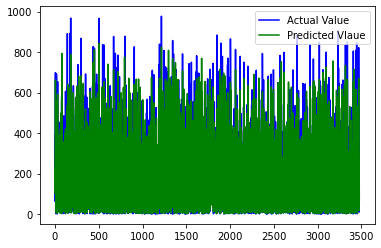

In [79]:
plt.plot(list(Y_test),color='blue',label='Actual Value')
plt.plot(X_test_prediction,color='green',label='Predicted Vlaue')
plt.legend()
plt.show()

#### Performing Normalization

In [80]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [81]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [82]:
X_test_prediction2=model.predict(X_test)

In [83]:
from sklearn import metrics
# R2 score 
testscore_1=metrics.r2_score(Y_test,X_test_prediction2)
testscore_2= metrics.mean_absolute_error(Y_test,X_test_prediction2)
print('R2 score',testscore_1)
print('Mean absolute error',testscore_2)

R2 score 0.8241919917255808
Mean absolute error 50.81838890144666
